# Retail Sales Data Analysis

## Project Overview
This project explores retail sales data to identify patterns, trends, and insights that can support business decision-making. The analysis focuses on understanding sales performance across different categories, time periods, and regions using Python and data analytics techniques.


## Objectives
The objectives of this analysis are to:
- Explore and understand the structure of the retail sales dataset
- Clean and prepare the data for analysis
- Identify key sales trends and patterns
- Generate insights that could help improve retail performance


## Dataset Overview

This analysis uses a retail sales dataset from Kaggle. The dataset is provided as three separate CSV files:

- **Sales dataset**: Contains weekly sales data for each store and department, including information on whether the week was a holiday.
- **Features dataset**: Includes additional variables such as temperature, fuel price, consumer price index (CPI), unemployment rate, and promotional markdowns.
- **Stores dataset**: Contains background information about each store, including store type and store size.

These datasets are explored individually and will be combined where necessary to support analysis of sales trends and patterns across stores and time.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Environment is ready ✅")


Environment is ready ✅


In [2]:
import pandas as pd

features = pd.read_csv("../data/Features data set.csv")
sales = pd.read_csv("../data/sales data-set.csv")
stores = pd.read_csv("../data/stores data-set.csv")

features.head(), sales.head(), stores.head()


(   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  05/02/2010        42.31       2.572        NaN        NaN   
 1      1  12/02/2010        38.51       2.548        NaN        NaN   
 2      1  19/02/2010        39.93       2.514        NaN        NaN   
 3      1  26/02/2010        46.63       2.561        NaN        NaN   
 4      1  05/03/2010        46.50       2.625        NaN        NaN   
 
    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 0        NaN        NaN        NaN  211.096358         8.106      False  
 1        NaN        NaN        NaN  211.242170         8.106       True  
 2        NaN        NaN        NaN  211.289143         8.106      False  
 3        NaN        NaN        NaN  211.319643         8.106      False  
 4        NaN        NaN        NaN  211.350143         8.106      False  ,
    Store  Dept        Date  Weekly_Sales  IsHoliday
 0      1     1  05/02/2010      24924.50      False
 1      1

In [3]:
sales.shape

(421570, 5)

## Initial Data Exploration
This section examines the structure and contents of the datasets, including their dimension, column names, and data types to gain an overall understanding of the information available.

In [3]:
features.shape, sales.shape, stores.shape


((8190, 12), (421570, 5), (45, 3))

In [4]:
features.columns, sales.columns, stores.columns


(Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
        'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
        'IsHoliday'],
       dtype='object'),
 Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object'),
 Index(['Store', 'Type', 'Size'], dtype='object'))

In [5]:
features.info()
sales.info()
stores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         4

## Data Cleaning and Preparation
In this section, the dataset is cleaned and prepared for analysis by handling missing values, correcting data types, and making adjustments to improve the data quality.

In [6]:
# Check for missing values in each dataset
features.isnull().sum(), sales.isnull().sum(), stores.isnull().sum()


(Store              0
 Date               0
 Temperature        0
 Fuel_Price         0
 MarkDown1       4158
 MarkDown2       5269
 MarkDown3       4577
 MarkDown4       4726
 MarkDown5       4140
 CPI              585
 Unemployment     585
 IsHoliday          0
 dtype: int64,
 Store           0
 Dept            0
 Date            0
 Weekly_Sales    0
 IsHoliday       0
 dtype: int64,
 Store    0
 Type     0
 Size     0
 dtype: int64)

### Missing Value Summary
Missing values are present in the features dataset, especially within the markdown and economic indicator columns. No missing values were found in the sales or stores datasets.


### Handling Missing Values
To address the missing values indentified, suitable methods were applied to ensure the dataset was ready for further analysis.

In [7]:
# Fill missing markdown values with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features[markdown_cols] = features[markdown_cols].fillna(0)

# Forward fill CPI and Unemployment
features[['CPI', 'Unemployment']] = features[['CPI', 'Unemployment']].fillna(method='ffill')

# Recheck missing values
features.isnull().sum()


C:\Users\NIKKY\AppData\Local\Temp\ipykernel_13488\1925200142.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features[['CPI', 'Unemployment']] = features[['CPI', 'Unemployment']].fillna(method='ffill')


Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

### Correcting Data types
This step converts keys columns into the correct formats, especially the date fields, so the datasets are consistent and ready for analysis.

In [8]:
# Convert Date columns to datetime
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True, errors='coerce')
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True, errors='coerce')

# Ensure IsHoliday is boolean in both datasets
features['IsHoliday'] = features['IsHoliday'].astype(bool)
sales['IsHoliday'] = sales['IsHoliday'].astype(bool)

# Optional: ensure ID columns are integers where appropriate
sales['Store'] = sales['Store'].astype(int)
sales['Dept'] = sales['Dept'].astype(int)
features['Store'] = features['Store'].astype(int)
stores['Store'] = stores['Store'].astype(int)

# Check dtypes
features.dtypes, sales.dtypes, stores.dtypes


(Store                    int32
 Date            datetime64[ns]
 Temperature            float64
 Fuel_Price             float64
 MarkDown1              float64
 MarkDown2              float64
 MarkDown3              float64
 MarkDown4              float64
 MarkDown5              float64
 CPI                    float64
 Unemployment           float64
 IsHoliday                 bool
 dtype: object,
 Store                    int32
 Dept                     int32
 Date            datetime64[ns]
 Weekly_Sales           float64
 IsHoliday                 bool
 dtype: object,
 Store     int32
 Type     object
 Size      int64
 dtype: object)

### Exploratory Data Analysis
This section explores the cleaned datasets to identify patterns, trends, and key characteristics using descriptive statistics and visuals analysis. The aim is to gain initial insights into sales performance across stores, departments and time periods.

In [9]:
# Descriptive statistics for weekly sales
sales['Weekly_Sales'].describe()


count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

The descriptive statistics show that the average weekly sales value is approximately 15,981, while the median is significantly lower at around 7,612. This indicates that the distribution of weekly sales is positively skewed, with a small number of very high sales values increasing the overall average. The wide range between the minimum and maximum values suggests substantial variation in weekly sales across stores and departments.

In [10]:
# Average weekly sales by store
sales.groupby('Store')['Weekly_Sales'].mean().head()


Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

The results show that average weekly sales vary significantly across different stores. For example, Store 4 and Store 2 record notably higher average weekly sales compared to Store 3 and Store 5. This highlights differences in sales performance between stores, which may be influenced by factors such as store size, location, or customer demand.

### Average Weekly Sales by Department
This analysis examines average weekly sales across different departments to identify variations in performance and highlight departments that contribute most significantly to overall sales.

In [11]:
# Average weekly sales by department
sales.groupby('Dept')['Weekly_Sales'].mean().head()


Dept
1    19213.485088
2    43607.020113
3    11793.698516
4    25974.630238
5    21365.583515
Name: Weekly_Sales, dtype: float64

The results indicate noticeable variation in average weekly sales across departments. Department 2 records the highest average weekly sales, suggesting it is a major contributor to overall revenue. In contrast, Department 3 shows the lowest average weekly sales among the departments displayed. This variation highlights differences in sales performance between departments, which may reflect factors such as product category, customer demand, or department size.

### Sales Trends Over Time
This section explores how weekly sales change over time to identify overall patterns and seasonal behaviour in retail performance.

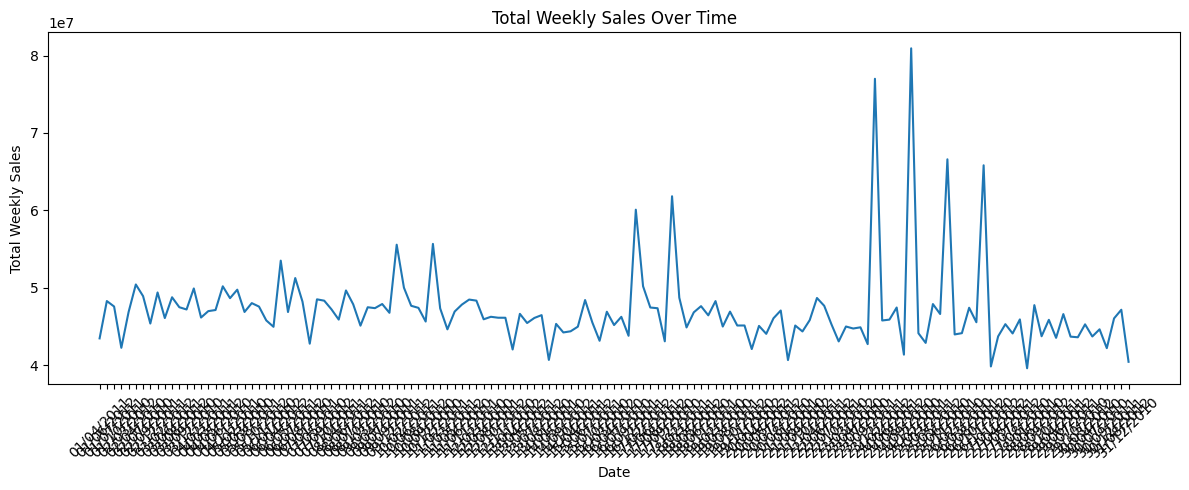

In [4]:
import matplotlib.pyplot as plt

total_sales_by_date = (
    sales.groupby("Date")["Weekly_Sales"]
    .sum()
    .sort_index()
)

plt.figure(figsize=(12, 5))
plt.plot(total_sales_by_date.index, total_sales_by_date.values)
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The line chart shows fluctuations in total weekly sales over the observed period. While sales vary from week to week, the overall pattern appears relatively stable, with noticeable spikes at certain points in time. These peaks may correspond to seasonal effects or holiday periods, which can be explored further in subsequent analysis.

### Holiday vs Non-Holiday Sales Comparison
This section compares weekly sales during holiday periods and non-holiday periods to assess whether holidays have a noticeable impact on retail sales performance.

In [5]:
# Compare average weekly sales for holiday vs non-holiday weeks
holiday_comparison = sales.groupby("IsHoliday")["Weekly_Sales"].mean()
holiday_comparison


IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

The results show that average weekly sales are higher during holiday weeks than during non-holiday weeks, indicating that holiday periods positively influence retail sales performance.

### Impact of Markdown on Weekly Sales
This section explores how markdowns influence weekly sales and whether higher markdown activity is associated with increased sales performance.

In [6]:
# Relationship between total markdowns and weekly sales
sales_with_markdowns = sales.merge(
    features[['Store', 'Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']],
    on=['Store', 'Date'],
    how='left'
)

sales_with_markdowns['Total_Markdown'] = sales_with_markdowns[
    ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
].sum(axis=1)

sales_with_markdowns[['Total_Markdown', 'Weekly_Sales']].corr()


,Total_Markdown,Weekly_Sales
Total_Markdown,1.000000,0.065237
Weekly_Sales,0.065237,1.000000


The correlation analysis shows a weak positive relationship between total markdown value and weekly sales. This suggests that while markdowns may contribute slightly to increased sales, they are not a strong standalone driver of sales performance. Other factors such as store characteristics, seasonality, and customer demand are likely to play a more significant role.

### Sales Comparison by Store Type
 This section compares average weekly sales across different store types to identify whether store classification influences sales performance.

In [7]:
# Average weekly sales by store type
sales_by_store_type = sales.merge(
    stores[['Store', 'Type']],
    on='Store',
    how='left'
)

sales_by_store_type.groupby('Type')['Weekly_Sales'].mean()


Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

The results show clear differences in average weekly sales across store types. 
Type A stores record the highest average weekly sales at approximately 20,100, followed by Type B stores at around 12,237, while Type C stores have the lowest average weekly sales at approximately 9,520. 
This suggests that store type plays an important role in sales performance, potentially reflecting differences in store size, customer demand, or location.


## Key Findings and Insights
The exploratory data analysis revealed several important insights into retail sales performance. 
Average weekly sales vary significantly across stores, departments, and store types, indicating uneven sales performance within the retail network. 
Store Type A consistently records the highest average weekly sales, while Type C stores generate the lowest, suggesting that store format or scale plays a role in revenue generation.

Sales trends over time show noticeable fluctuations, with sharp peaks occurring during certain periods, which may correspond to seasonal demand or promotional events. 
Holiday weeks generate higher average weekly sales compared to non-holiday weeks, highlighting the positive impact of holidays on consumer spending.

The analysis of markdowns indicates only a weak positive relationship between total markdown value and weekly sales, suggesting that markdowns alone do not strongly drive sales increases. 
Other factors such as store characteristics, customer demand, and seasonal trends are likely to have a greater influence on sales performance.


## Conclusion and Recommendations
This project explored retail sales data to identify patterns, trends, and key factors influencing weekly sales performance. 
Through data cleaning, preparation, and exploratory data analysis, meaningful insights were obtained across stores, departments, time periods, and promotional activity.

The findings show that sales performance varies widely by store type and department, with larger store formats consistently generating higher average weekly sales. 
Holiday periods are associated with increased sales, confirming the importance of seasonal demand in retail performance. 
While markdowns are commonly used as a promotional strategy, the weak relationship between total markdowns and weekly sales suggests that discounts alone are not a strong driver of revenue growth.

Based on these insights, retailers may benefit from focusing on store-level strategies, optimising product assortment by department, and aligning promotions with seasonal demand rather than relying solely on markdowns. 
Further analysis could incorporate external factors such as regional demographics, economic indicators, or advanced forecasting techniques to improve sales predictions and decision-making.

